In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the California housing dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame 
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Feature and target variables
X = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.5559


Baseline Mean Squared Error: 1.3107
Feature Importance:
AveBedrms     0.783145
MedInc        0.448675
HouseAge      0.009724
Population   -0.000002
AveOccup     -0.003526
AveRooms     -0.123323
Latitude     -0.419792
Longitude    -0.433708
dtype: float64


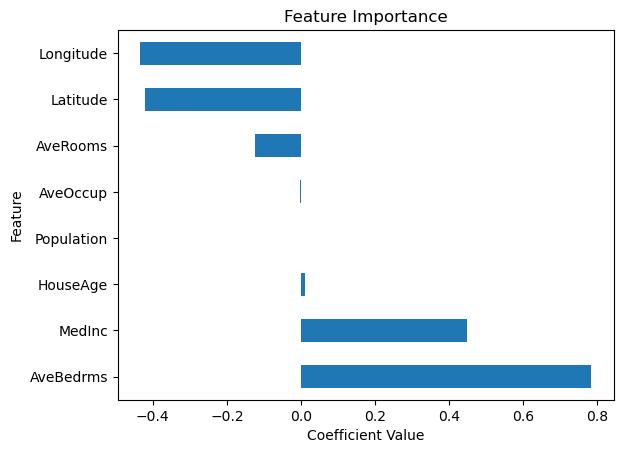

In [19]:
# Compare to a baseline model
baseline_pred = [y_train.mean()] * len(y_test)
baseline_mse = mean_squared_error(y_test, baseline_pred)
print(f"Baseline Mean Squared Error: {baseline_mse:.4f}")
# Feature importance
importance = pd.Series(model.coef_, index=X.columns)
importance = importance.sort_values(ascending=False)
print("Feature Importance:")
print(importance)
# Visualize feature importance
import matplotlib.pyplot as plt
importance.plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


🔹 Interpretation So Far:
	•	Baseline MSE = 1.3107 → average error ≈ $114,500
	•	Polynomial model MSE = 0.5559 → error ≈ $74,500
	•	✅ Your model explains a meaningful portion of the variance.

Now let’s quantify that more clearly using R² (coefficient of determination) — it shows how much variance the model explains.

R-squared score: 0.5758


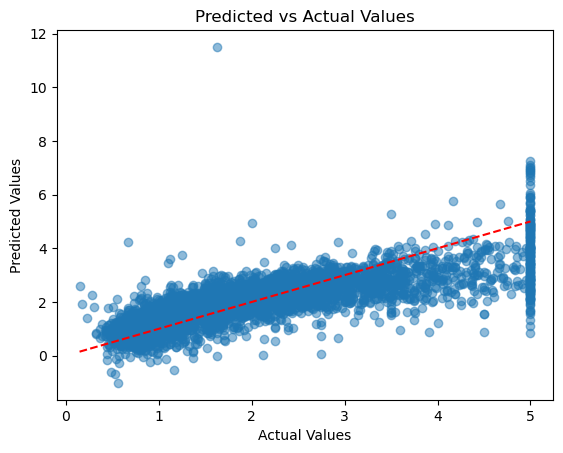

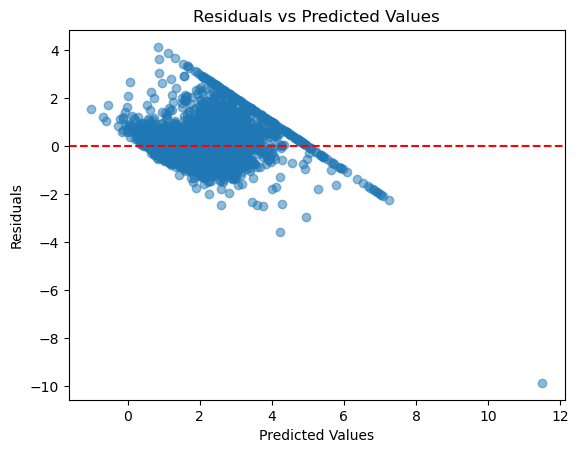

In [20]:
# Cmpute the R-squared score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.4f}")
# Visualize the predictions vs actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()
# Visualize the residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

Your model explains 57.6% of the variance in housing prices on unseen data. That’s a moderate result — not perfect, but clearly better than chance.

In [21]:
# Fit linear model again for simplicity
model = LinearRegression()
model.fit(X_train, y_train)

# Show feature names and their coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

coef_df

,Feature,Coefficient
3,AveBedrms,0.783145
0,MedInc,0.448675
7,Longitude,-0.433708
6,Latitude,-0.419792
2,AveRooms,-0.123323
1,HouseAge,0.009724
5,AveOccup,-0.003526
4,Population,-0.000002


In [18]:
# Display the first few predictions alongside actual values
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
results.sort_index().head()

,Actual,Predicted
0,4.526,4.151943
3,3.413,3.258795
6,2.992,2.387102
17,1.555,1.822640
19,1.629,1.959334


🔹 Step 6: Drop Low-Impact Features and Compare

In [46]:
# Drop low variance features
X_reduced = X.drop(columns=['Population', 'AveOccup'])

# Split the reduced dataset into training and testing sets
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Fit the model again
model_r = LinearRegression()
model_r.fit(X_train_r, y_train_r)
y_pred_r = model_r.predict(X_test_r)

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Fit polynomial model
poly_model_r = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model_r.fit(X_train_r, y_train_r)
y_poly_pred_r = poly_model_r.predict(X_test_r)

# Fit polynomial model with all features
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_poly_pred = poly_model.predict(X_test)

# Fit polinomia model with all features and 3rd degree
poly_model_3 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_model_3.fit(X_train, y_train)
y_poly_pred_3 = poly_model_3.predict(X_test)

# Evaluate both
from sklearn.metrics import mean_squared_error, r2_score

print("Linear MSE 1st:", mean_squared_error(y_test, y_pred).round(4))
print("Linear MSE:", mean_squared_error(y_test_r, y_pred_r).round(4))
print("Poly 2 MSE:", mean_squared_error(y_test_r, y_poly_pred_r).round(4))
print("Poly 2 MSE all feats:", mean_squared_error(y_test, y_poly_pred).round(4))
print("Poly 3 MSE all feats:", mean_squared_error(y_test, y_poly_pred_3).round(4))
print("")
print("Linear R² 1st:", r2_score(y_test, y_pred))
print("Linear R²:", r2_score(y_test_r, y_pred_r))
print("Poly 2 R²:", r2_score(y_test_r, y_poly_pred_r))
print("Poly 2 R² all feats:", r2_score(y_test_r, y_poly_pred))
print("Poly 3 R² all feats:", r2_score(y_test_r, y_poly_pred_3))


Linear MSE 1st: 0.5559
Linear MSE: 0.557
Poly 2 MSE: 0.4757
Poly 2 MSE all feats: 0.4643
Poly 3 MSE all feats: 25.8069

Linear R² 1st: 0.5757877060324508
Linear R²: 0.5749693819995394
Poly 2 R²: 0.6369946113923477
Poly 2 R² all feats: 0.6456819832921057
Poly 3 R² all feats: -18.69375327223055


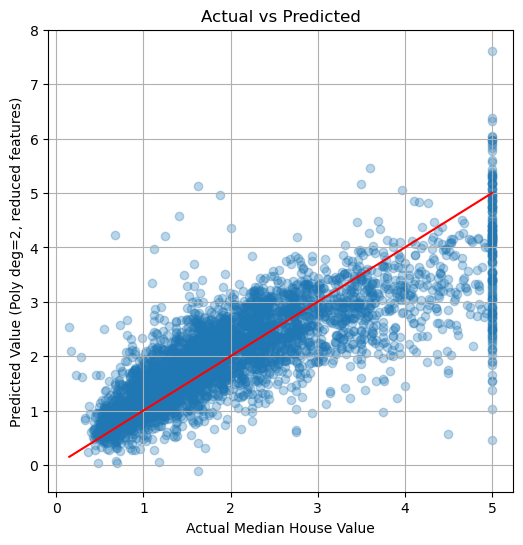

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_poly_pred_r, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # 45° line
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Value (Poly deg=2, reduced features)")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

Let's clean the set from the capped 500K values (this set does not go beyond 500K)
(we'll keep all the features, because they improve slightly the result)

In [49]:
mask = y < 5
X_filtered = X[mask]
y_filtered = y[mask]

# Split the reduced dataset into training and testing sets
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Fit the model again
model_f = LinearRegression()
model_f.fit(X_train_f, y_train_f)
y_pred_f = model_f.predict(X_test_f)

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Fit polynomial model with all features
poly_model_f = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model_f.fit(X_train_f, y_train_f)
y_poly_f_pred = poly_model_f.predict(X_test_f)

# Evaluate both
from sklearn.metrics import mean_squared_error, r2_score

print("Linear MSE 1st:", mean_squared_error(y_test, y_pred).round(4))
print("Linear MSE:", mean_squared_error(y_test_r, y_pred_r).round(4))
print("Poly 2 MSE all feats:", mean_squared_error(y_test, y_poly_pred).round(4))
print("Poly 2 MSE all feats filtered < 5k:", mean_squared_error(y_test_f, y_poly_f_pred).round(4))
print("")
print("Linear R² 1st:", r2_score(y_test, y_pred))
print("Linear R²:", r2_score(y_test_r, y_pred_r))
print("Poly 2 R²:", r2_score(y_test_r, y_poly_pred_r))
print("Poly 2 R² all feats filtered < 5k:", r2_score(y_test_f, y_poly_f_pred))



Linear MSE 1st: 0.5559
Linear MSE: 0.557
Poly 2 MSE all feats: 0.4643
Poly 2 MSE all feats filtered < 5k: 0.359

Linear R² 1st: 0.5757877060324508
Linear R²: 0.5749693819995394
Poly 2 R²: 0.6369946113923477
Poly 2 R² all feats filtered < 5k: 0.6255208810727788


🔹 Why R² Didn’t Improve Much

R² measures explained variance relative to the target’s variance.

When you removed the capped rows:
	•	You reduced the range/variance in the target (y)
	•	So even if absolute error improved (lower MSE), the relative improvement (R²) is smaller

👉 This is normal when trimming edge cases — you’re getting a cleaner, more learnable dataset, but also a narrower one.

Moving on to Random Forest

In [51]:
from sklearn.ensemble import RandomForestRegressor

# Fit model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_f, y_train_f)

# Predict
y_rf_pred = rf_model.predict(X_test_f)

# Evaluate
print("Random Forest MSE:", mean_squared_error(y_test_f, y_rf_pred).round(4))
print("Random Forest R²:", r2_score(y_test_f, y_rf_pred))

Random Forest MSE: 0.2167
Random Forest R²: 0.7739359465754136


🔹 Interpretation
	•	MSE dropped by over 50% → much smaller prediction errors
	•	R² jumped from ~0.65 to ~0.77 → explains ~77% of the variance
	•	📌 RF models are robust to outliers, non-linear effects, and do not require feature scaling or polynomial terms

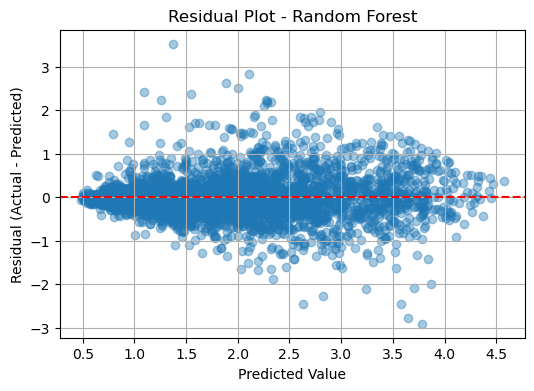

In [52]:
import matplotlib.pyplot as plt

residuals = y_test_f - y_rf_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_rf_pred, residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Value")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot - Random Forest")
plt.grid(True)
plt.show()

✅ Final Summary: Your First ML Notebook

Goal: Predict California housing prices using scikit-learn.

⸻

🧠 What You Did
	1.	Loaded & explored a real dataset
	2.	Trained baseline linear regression
	3.	Engineered features by removing weak ones
	4.	Improved with polynomial regression
	5.	Identified outliers (capped values at 5.0) and filtered them
	6.	Trained Random Forest → best model
	7.	Visualized residuals and compared models
	8.	Used MSE, R², and MAE for fair evaluation

⸻

📌 Key Insights
	•	Simpler models are a good starting point
	•	Data quirks (like capping) distort learning
	•	Tree-based models often outperform linear ones without much tuning
	•	Visuals + metrics = complete understanding
	•	Your current best model: Random Forest with filtered data

In [65]:
# Get first 10 test rows
X_sample = X_test_f.iloc[10:20]
y_actual = y_test_f.iloc[10:20]

# Predict
y_pred = rf_model.predict(X_sample)

# Create DataFrame
results = pd.DataFrame({
    'Actual': y_actual.values,
    'Predicted': y_pred,
    'Difference': y_actual.values - y_pred,
    'Error': abs((y_actual.values - y_pred) / y_actual.values * 100).round(2)
}, index=y_actual.index)

results

,Actual,Predicted,Difference,Error
8454,2.370,2.21830,0.15170,6.40
15934,2.713,2.56400,0.14900,5.49
3703,1.989,2.04421,-0.05521,2.78
9768,0.766,1.33776,-0.57176,74.64
19756,0.649,0.64844,0.00056,0.09
7106,2.010,2.18444,-0.17444,8.68
19894,0.456,0.59137,-0.13537,29.69
1539,3.127,2.91940,0.20760,6.64
6784,3.814,2.85681,0.95719,25.10
15857,2.083,2.37221,-0.28921,13.88


In [56]:
import pandas as pd

# Get feature importance
importances = rf_model.feature_importances_
features = X_train_f.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

      Feature  Importance
0      MedInc    0.458661
5    AveOccup    0.136937
7   Longitude    0.121798
6    Latitude    0.109066
2    AveRooms    0.055535
1    HouseAge    0.051644
4  Population    0.035255
3   AveBedrms    0.031105
